Date : 05/02/2026

#### WHEN TO USE MULTIPLE REGRESSION?

Use when : Output depends on more than one input

Examples:

House price (area + rooms + location)  
Salary (experience + age + education)  
Marks (study hours + attendance)

Formula : y=b0+b1x1+b2x2

Where:

- y = predicted salary
- x1 = Experience
- x2 = Age
- b0 = intercept
- b1, b2 = coefficients (weights)

Salary depends on:

Experience  
Age

Example:

| Experience | Age | Salary |
| ---------- | --- | ------ |
| 2          | 22  | 30000  |
| 5          | 25  | 50000  |
| 8          | 30  | 80000  |

Equation becomes:  
Salary = b0 + b1*Experience + b2*Age

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("mtcars.csv")
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [140]:
df.shape

(32, 11)

In [141]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [142]:
df.isnull().sum()       # checking missing values

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [143]:
x = df[['disp','hp','wt']]   # 2 inputs
y = df['mpg']                     # output

# Why?
# X must be 2D table
# y is 1D column

In [144]:
x;

In [145]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [146]:
model.fit(x, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [147]:
model.score(x,y)    # r^2 score means how prediction correct

0.8268361424946447

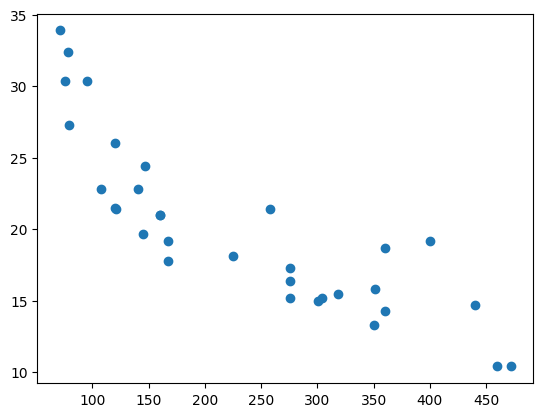

In [148]:
plt.scatter(x['disp'],y)    # on x-axis disp and on y-axis mpg

In [149]:
from sklearn.feature_selection import SequentialFeatureSelector

In [150]:
fs = SequentialFeatureSelector(LinearRegression(),direction = 'backward',)
# forward add feature one by one
# backward keep first features and removes backward features and keeps best features

In [151]:
x = df.drop('mpg', axis = 1)
# removes output coloumn
# axis=1 → column delete
# axis=0 → row delete
# kept only input features
# before: cyl disp hp wt qsec mpg
# after:  cyl disp hp wt qsec

In [152]:
fs.fit(x, y)

,estimator estimator: estimator instanceAn unfitted estimator.,LinearRegression()
,"n_features_to_select n_features_to_select: ""auto"", int or float, default=""auto""If `""auto""`, the behaviour depends on the `tol` parameter:- if `tol` is not `None`, then features are selected while the score change does not exceed `tol`.- otherwise, half of the features are selected.If integer, the parameter is the absolute number of features to select.If float between 0 and 1, it is the fraction of features to select... versionadded:: 1.1 The option `""auto""` was added in version 1.1... versionchanged:: 1.3 The default changed from `""warn""` to `""auto""` in 1.3.",'auto'
,"tol tol: float, default=NoneIf the score is not incremented by at least `tol` between twoconsecutive feature additions or removals, stop adding or removing.`tol` can be negative when removing features using `direction=""backward""`.`tol` is required to be strictly positive when doing forward selection.It can be useful to reduce the number of features at the cost of a smalldecrease in the score.`tol` is enabled only when `n_features_to_select` is `""auto""`... versionadded:: 1.1",None
,"direction direction: {'forward', 'backward'}, default='forward'Whether to perform forward selection or backward selection.",'backward'
,"scoring scoring: str or callable, default=NoneScoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)`` that returns a single value. See :ref:`scoring_callable` for details.- `None`: the `estimator`'s :ref:`default evaluation criterion ` is used.",None
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. In all othercases, :class:`~sklearn.model_selection.KFold` is used. These splittersare instantiated with `shuffle=False` so the splits will be the sameacross calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",5
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel. When evaluating a new feature toadd or remove, the cross-validation procedure is parallel over thefolds.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


In [153]:
fs.get_support()    # method for checking which coloumn is kept

array([ True,  True,  True, False,  True,  True, False, False, False,
       False])

In [154]:
x = x.iloc[:, fs.get_support()]     # keep only true coloumn

In [155]:
x

,cyl,disp,hp,wt,qsec
0,6,160.0,110,2.620,16.46
1,6,160.0,110,2.875,17.02
2,4,108.0,93,2.320,18.61
3,6,258.0,110,3.215,19.44
4,8,360.0,175,3.440,17.02
5,6,225.0,105,3.460,20.22
6,8,360.0,245,3.570,15.84
7,4,146.7,62,3.190,20.00
8,4,140.8,95,3.150,22.90
9,6,167.6,123,3.440,18.30


In [156]:
model.fit(x, y)
# now model train only on selected(true) columns

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [157]:
model.score(x, y)   # r^2 score means how prediction correct

0.8501969128547608

In [158]:
cyl = 4
disp = 220
hp = 90
wt = 4.23
qsec = 3.45

In [159]:
newdf = pd.DataFrame({
    'cyl': [cyl],
    'disp': [disp],
    'hp': [hp],
    'wt': [wt],
    'qsec': [qsec]
})

In [160]:
newdf

,cyl,disp,hp,wt,qsec
0,4,220,90,4.23,3.45


In [161]:
model.predict(newdf)

array([15.4554969])